https://public.tableau.com/app/profile/deependra.verma1198/viz/Healthcare-DiabetesDashboard_16904817873760/Dashboard1
# Capstone Project: Healthcare - PGP
## Problem Statement:


Data Exploration:

Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

Visually explore these variables using histograms. Treat the missing values accordingly.

There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

 

Data Exploration:

Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

Perform correlation analysis. Visually explore it using a heat map.

 

Project Task: Week 2

Data Modeling:

Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

Apply an appropriate classification algorithm to build a model.

Compare various models with the results from KNN algorithm.

Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

Please be descriptive to explain what values of these parameter you have used.

 

Data Reporting:

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

Pie chart to describe the diabetic or non-diabetic population

Scatter charts between relevant variables to analyze the relationships

Histogram or frequency charts to analyze the distribution of the data

Heatmap of correlation analysis among the relevant variables

Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

# Solution:
## Week 1:
### Data Exploration:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("health care diabetes.csv")

In [3]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
165,6,104,74,18,156,29.9,0.722,41,1
389,3,100,68,23,81,31.6,0.949,28,0
589,0,73,0,0,0,21.1,0.342,25,0
323,13,152,90,33,29,26.8,0.731,43,1
285,7,136,74,26,135,26.0,0.647,51,0


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As per the Problem, it is given that - "Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value".

Now let us change the "0" value to Nan, so that the pandas function can understand it as Null. From all the features, we will consider input features under this and also from all the input features only Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI. Out of this, pregnancy is genuine case to have "0" value, so we will apply this to rest of the features. 


In [7]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NAN)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

In [10]:
df.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

### 2.Visually explore these variables using histograms. Treat the missing values accordingly.

Let us check the skewness of these features, so that we can have missing value treatment accordingly

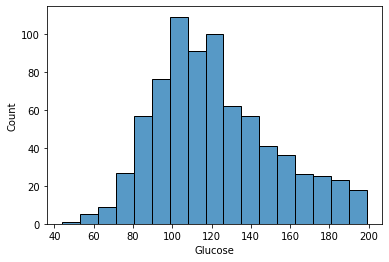

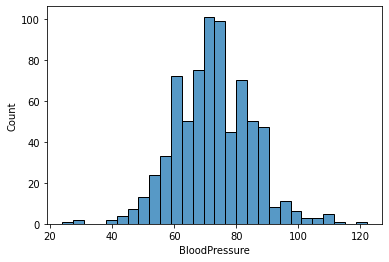

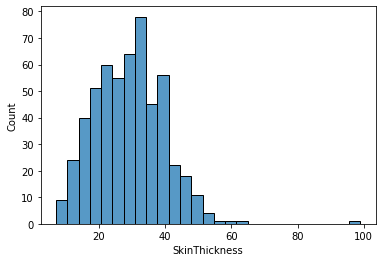

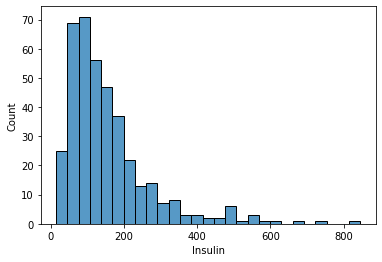

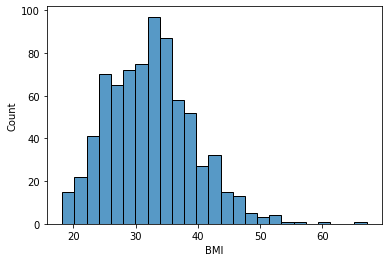

In [11]:
null_columns = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for x in null_columns:
    sns.histplot(df[x])
    plt.show()

As we can see that the Columns "SkinThickness","Insulin" are right or positive skewed and rest all are almost normally distributed. Also the missing value in "SkinThickness","Insulin" is more than 5% so we will randomly impute values in this, so that distribution will not change. 
In rest of the feature, we will use the mean value imputation, since they are MCAR and normally distributed with missing value < 5%

In [12]:
df["SkinThickness"][df["SkinThickness"].isnull()] = df["SkinThickness"].dropna().sample(df["SkinThickness"].isnull().sum(),random_state = 12345).values

In [13]:
df["Insulin"][df["Insulin"].isnull()] = df["Insulin"].dropna().sample(df["Insulin"].isnull().sum(),random_state = 12345).values

In [14]:
mean_col = ["Glucose","BloodPressure","BMI"]
for x in mean_col:
    df[x].fillna(df[x].mean(),inplace=True)

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

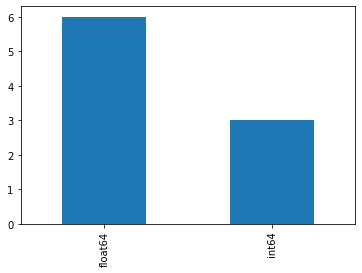

In [16]:
df.dtypes.value_counts().plot(kind = "bar")
plt.show()

### 4. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [17]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

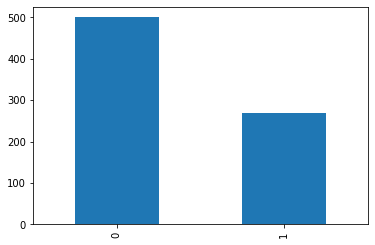

In [18]:
df["Outcome"].value_counts().plot(kind = "bar")
plt.show()

### Since classes in Outcome is little skewed so we will generate new samples using SMOTE (Synthetic Minority Oversampling Technique) for the class '1' which is under-represented in our data. We will use SMOTE out of many other techniques available since:
- It generates new samples by interpolation.
- It doesn't duplicate data.

In [19]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [20]:
X.shape,y.shape

((768, 8), (768,))

In [21]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
X_resample, y_resample = SMOTE(random_state=108).fit_resample(X,y)

In [24]:
X_resample.shape, y_resample.shape

((1000, 8), (1000,))

In [25]:
y_resample.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

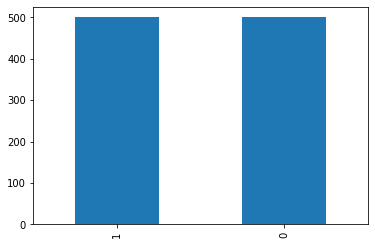

In [26]:
y_resample.value_counts().plot(kind = "bar")
plt.show()

In [27]:
df_new = pd.concat([X_resample,y_resample],axis = 1)

In [28]:
df_new.shape

(1000, 9)

### 5. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

<Figure size 1296x1080 with 0 Axes>

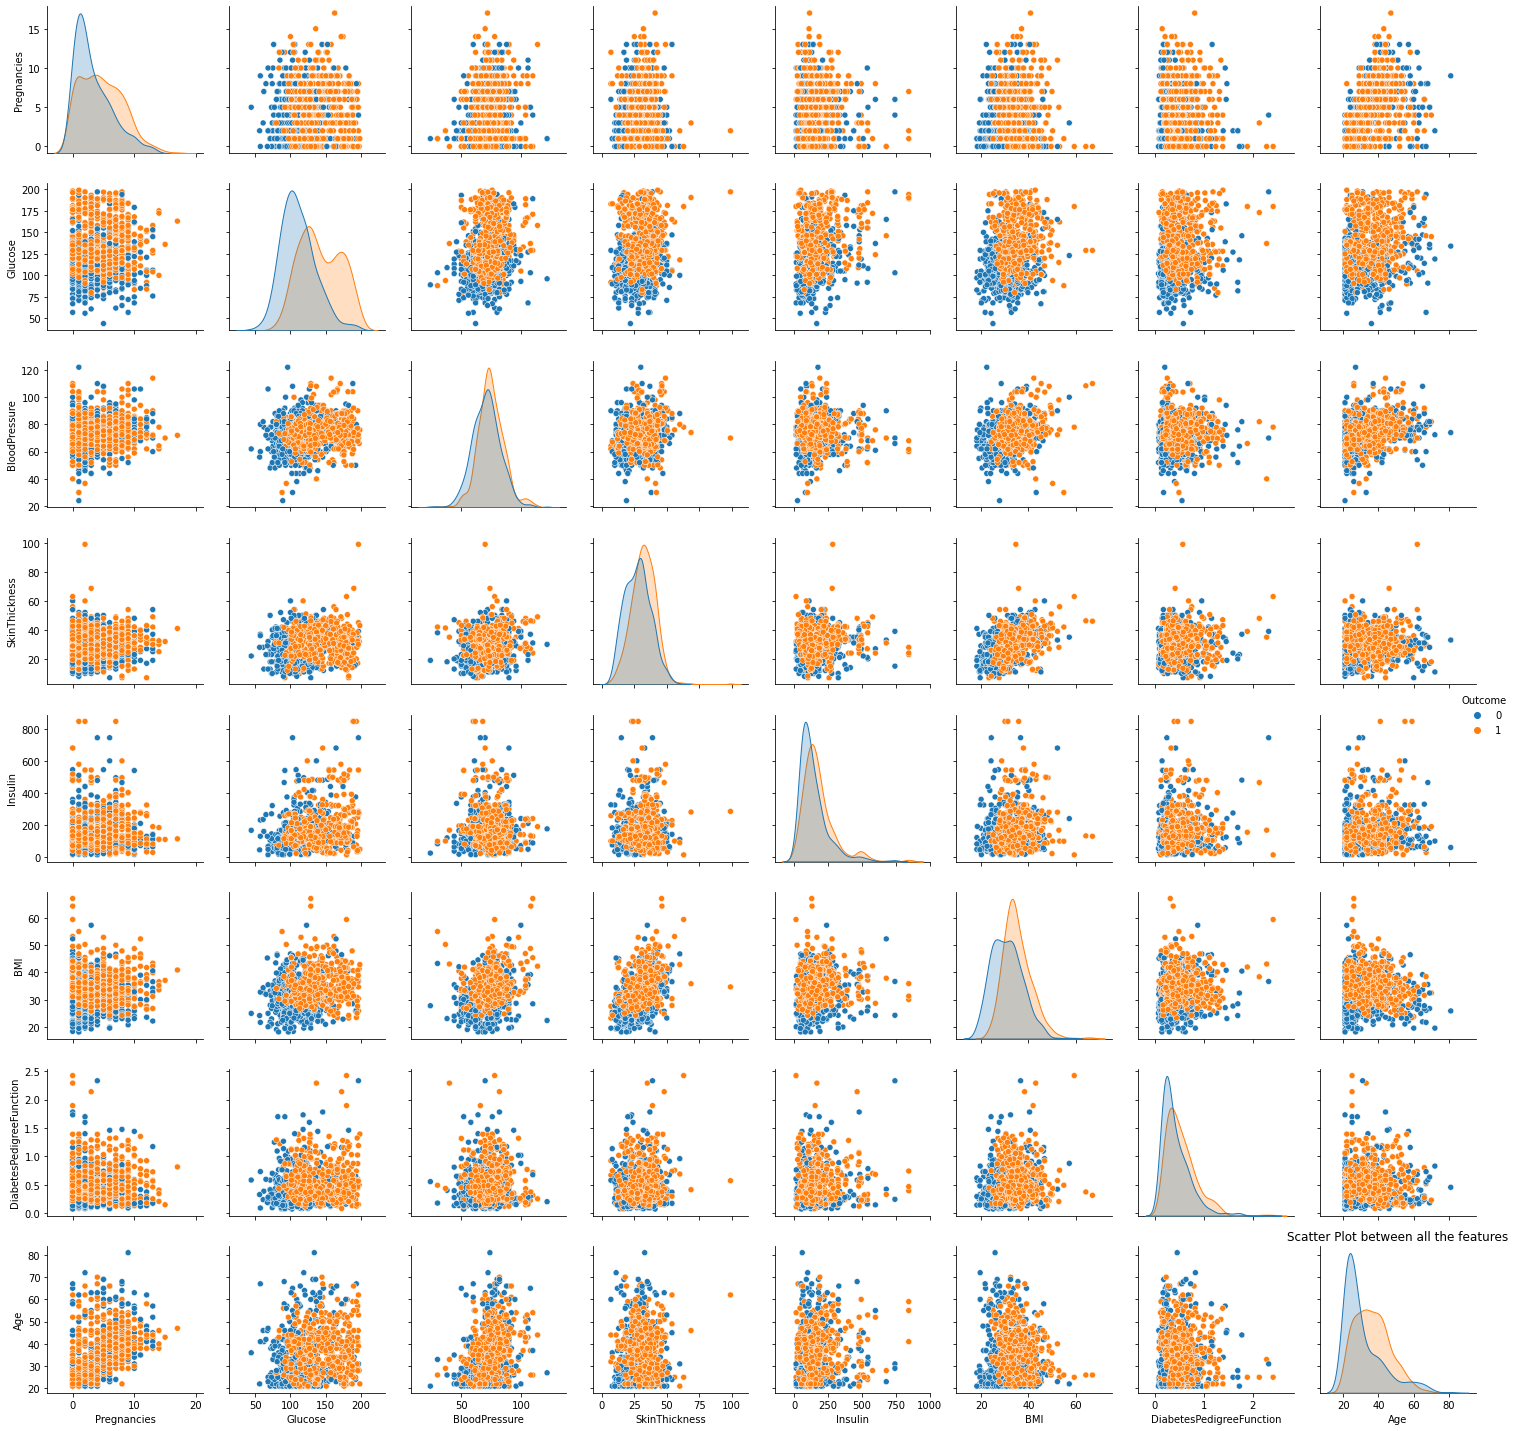

In [29]:
plt.figure(figsize=(18,15))
sns.pairplot(df_new,hue="Outcome")
plt.title("Scatter Plot between all the features")
plt.tight_layout()

### We have some interesting observations from above scatter plot of pairs of features:

* Glucose alone exhibits an impressive ability to differentiate between the Outcome classes.
* Age alone also possesses some discriminatory power to distinguish between the classes.
* None of the pairs in the dataset appear to distinctly separate the Outcome classes.
* Employing a combination of features is essential to construct a predictive model for the Outcome classes.

### 6. Perform correlation analysis. Visually explore it using a heat map.

In [30]:
df_new.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.116308,0.194147,0.079238,0.020985,0.018235,-0.016722,0.534123,0.210890
Glucose,0.116308,1.000000,0.221265,0.181597,0.325843,0.238409,0.133685,0.259308,0.502258
BloodPressure,0.194147,0.221265,1.000000,0.162288,0.045320,0.283344,-0.003977,0.334939,0.159506
SkinThickness,0.079238,0.181597,0.162288,1.000000,0.081382,0.470046,0.100965,0.096335,0.223871
Insulin,0.020985,0.325843,0.045320,0.081382,1.000000,0.152058,0.086236,0.126472,0.160500
BMI,0.018235,0.238409,0.283344,0.470046,0.152058,1.000000,0.136836,0.023129,0.330720
DiabetesPedigreeFunction,-0.016722,0.133685,-0.003977,0.100965,0.086236,0.136836,1.000000,0.018404,0.180917
Age,0.534123,0.259308,0.334939,0.096335,0.126472,0.023129,0.018404,1.000000,0.237777
Outcome,0.210890,0.502258,0.159506,0.223871,0.160500,0.330720,0.180917,0.237777,1.000000


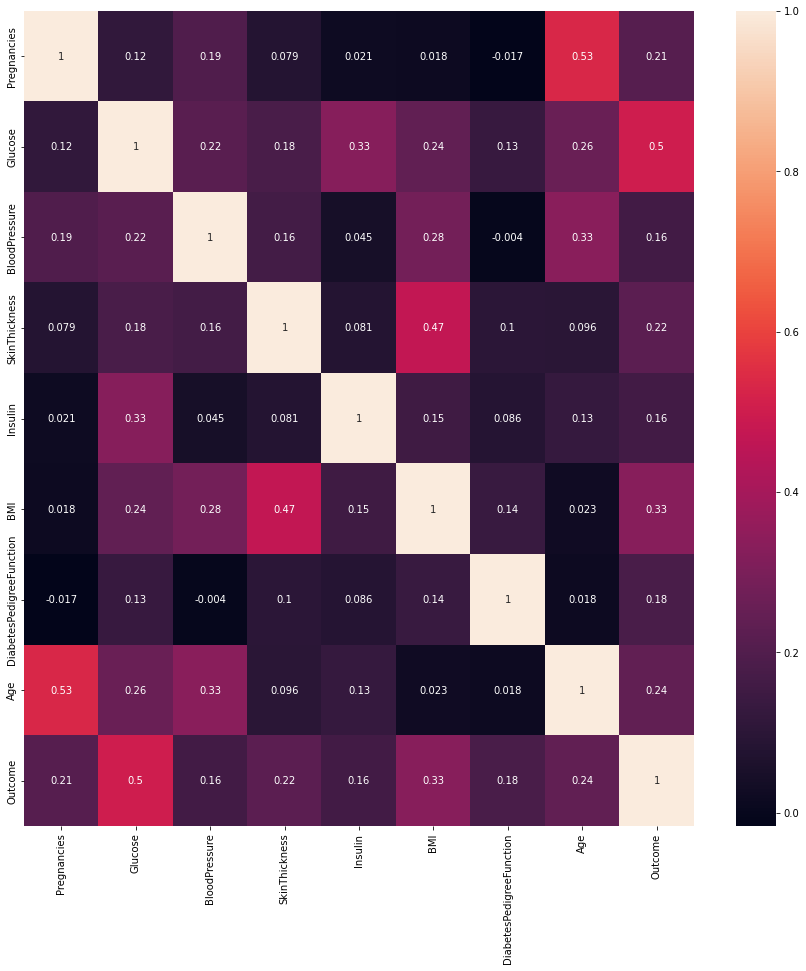

In [31]:
plt.figure(figsize = (15,15))
sns.heatmap(df_new.corr(),  annot=True)
plt.show()

It appears from correlation matrix and heatmap that there exists significant correlation between some pairs such
as -
Age-Pregnancies
BMI-SkinThickness
AGE - Glucose
Also we can see that no pair of variables have significant negative correlation, only "DiabetesPedigreeFunction" have small negative corelation with "Pregnancies" and "BloodPressure".

# Project Task: Week 2

## Data Modeling:

### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

As this is a classification problem, we will employ various popular classification models to train our data and then compare their performances on the test data to accurately predict the target variable "Outcome" using features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeF, and Age.

The correlation matrix of the resampled feature dataset (X_resample) is visualized using a heatmap to understand the relationships between features.

The following classification models will be utilized:

1) Logistic Regression

2) Decision Tree

3) Random Forest Classifier

4) K-Nearest Neighbour (KNN)

5) Support Vector Machine (SVM)

6) Naive Bayes

7) Ensemble Learning -> Boosting -> Adaptive Boosting

8) Ensemble Learning -> Boosting -> Gradient Boosting (XGBClassifier)

For training and testing the models, we will utilize GridSearchCV with Cross Validation (CV) set to 5. This will provide us insights into the model performance on diverse data. GridSearchCV will systematically loop through predefined hyperparameters and fit each model on the training set. It performs hyperparameter tuning, yielding optimal hyperparameters for each model. We will then retrain the models using these optimized hyperparameters and predict the test data to obtain metrics for comparing all models.

#### Performing Train - Test split on input data (To train and test model without Cross Validation and Hyper Parameter Tuning):

In [32]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV, KFold, GridSearchCV

In [33]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score, precision_recall_curve, average_precision_score

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.2,random_state=42)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 8), (200, 8), (800,), (200,))

In [36]:
models = []
model_accuracy = []
model_f1 = []
model_auc = []

## 1) Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
params = {"C":np.logspace(-20,50,150),"penalty": ["l1","l2"],"max_iter":[100,300]}
lr = LogisticRegression()
grid = GridSearchCV(lr,param_grid=params,cv=10,verbose=0)

In [39]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-20, 2.94984134e-20, 8.70156393e-20, 2.56682330e-19,
       7.57172149e-19, 2.23353771e-18, 6.58858186e-18, 1.94352711e-17,
       5.73309663e-17, 1.69117254e-16, 4.98869069e-16, 1.47158460e-15,
       4.34094109e-15, 1.28050875e-14, 3.77729765e-14, 1.11424288e-13,
       3.28683970e-13, 9.69565562e-13, 2.86006...
       1.36216020e+40, 4.01815648e+40, 1.18529241e+41, 3.49642455e+41,
       1.03138977e+42, 3.04243618e+42, 8.97470401e+42, 2.64739529e+43,
       7.80939607e+43, 2.30364794e+44, 6.79539592e+44, 2.00453398e+45,
       5.91305720e+45, 1.74425806e+46, 5.14528453e+46, 1.51777730e+47,
       4.47720223e+47, 1.32070362e+48, 3.89586614e+48, 1.14921870e+49,
       3.39001283e+49, 1.00000000e+50]),
                         'max_iter': [100, 300], 'penalty': ['l1', 'l2']})

In [40]:
grid.best_params_

{'C': 0.18270270041765452, 'max_iter': 100, 'penalty': 'l2'}

In [41]:
lr_main = LogisticRegression(C = 0.18270270041765452, max_iter =  100)

In [42]:
lr_main.fit(X_train,y_train)

LogisticRegression(C=0.18270270041765452)

In [43]:
lr_main.score(X_test,y_test)

0.73

In [44]:
print(lr_main.classes_)
prob_pred = lr_main.predict_proba(X_test)
prob_predict = lr_main.predict_proba(X_test)
prob_pred

[0 1]


array([[0.62963891, 0.37036109],
       [0.8774557 , 0.1225443 ],
       [0.11488181, 0.88511819],
       [0.15648213, 0.84351787],
       [0.70773706, 0.29226294],
       [0.55625796, 0.44374204],
       [0.84073089, 0.15926911],
       [0.89169314, 0.10830686],
       [0.30376518, 0.69623482],
       [0.83394209, 0.16605791],
       [0.2858698 , 0.7141302 ],
       [0.92430346, 0.07569654],
       [0.79603064, 0.20396936],
       [0.10111631, 0.89888369],
       [0.28554589, 0.71445411],
       [0.21734969, 0.78265031],
       [0.56097965, 0.43902035],
       [0.16743845, 0.83256155],
       [0.03223714, 0.96776286],
       [0.10941719, 0.89058281],
       [0.14287371, 0.85712629],
       [0.91891208, 0.08108792],
       [0.3723667 , 0.6276333 ],
       [0.85594814, 0.14405186],
       [0.93007672, 0.06992328],
       [0.06319276, 0.93680724],
       [0.56497168, 0.43502832],
       [0.11375242, 0.88624758],
       [0.61078855, 0.38921145],
       [0.24733158, 0.75266842],
       [0.

In [45]:
prob_pred = prob_pred[:,1]

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score,auc

### ROC Curve (Receiver Operating Characteristics Curve)

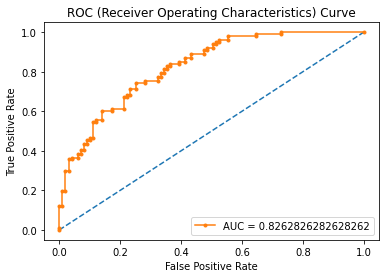

In [47]:
auc_lr = roc_auc_score(y_test,prob_pred)
fpr,tpr,thresholds = roc_curve(y_test,prob_pred)
plt.plot([0,1],[0,1],linestyle = "--")
plt.plot(fpr,tpr,marker = ".",label = f"AUC = {auc_lr}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

In [48]:
precision, recall, thresholds = precision_recall_curve(y_test,prob_pred)

In [49]:
confusion_matrix(y_test, lr_main.predict(X_test))

array([[70, 29],
       [25, 76]])

In [50]:
y_pred = lr_main.predict(X_test)
f1 = f1_score(y_test, y_pred)


In [51]:
auc_lr_pr = auc(recall,precision)

auc_lr_pr

0.8232153969824743

In [52]:
avg_prec = average_precision_score(y_test,prob_pred)
avg_prec

0.8244396502336783

The f1_score, average precision score, AUC are 0.7378640776699029,0.8244396502336783,0.8232153969824743 respectively 


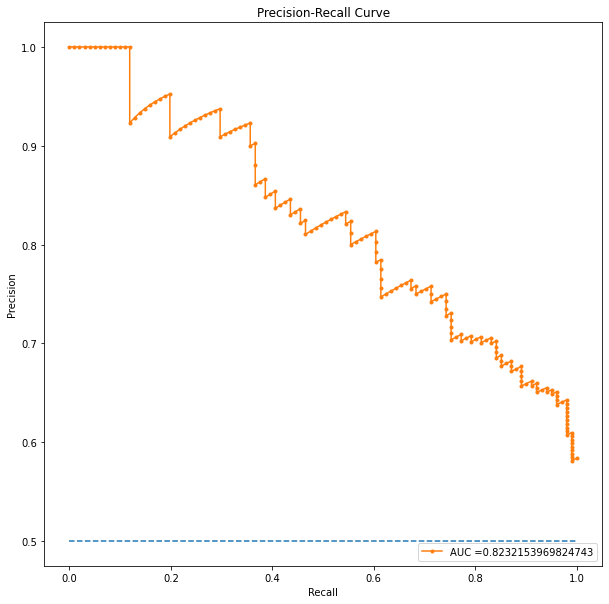

In [53]:
print(f"The f1_score, average precision score, AUC are {f1},{avg_prec},{auc_lr_pr} respectively " )
plt.figure(figsize=(10,10))
plt.plot([0,1],[0.5,0.5],linestyle = "--")
plt.plot(recall, precision, marker = ".", label = f"AUC ={auc_lr_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower right")
plt.show()


In [54]:
models.append("LR")
model_accuracy.append(accuracy_score(y_test,y_pred))
model_auc.append(auc_lr)
model_f1.append(f1)

## 2) Decision Tree:

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()

In [56]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
print(dt1.score(X_train,y_train))
print(dt1.score(X_test,y_test))

1.0
0.705


## Performance evaluation and optimizing parameters using GridSearchCV:

In [58]:
params = {"criterion":["gini","entropy"],
'max_depth':[1,2,3,4,5,None]
}

In [59]:
grid_dt = GridSearchCV(dt1,param_grid=params,cv = 10, verbose=0)

In [60]:
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None]})

In [61]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [62]:
dt2 = DecisionTreeClassifier(max_depth=5)

In [63]:
dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [64]:
dt2.score(X_train,y_train)

0.85

In [65]:
dt2.score(X_test,y_test)

0.75

AUC: 0.8062806280628063


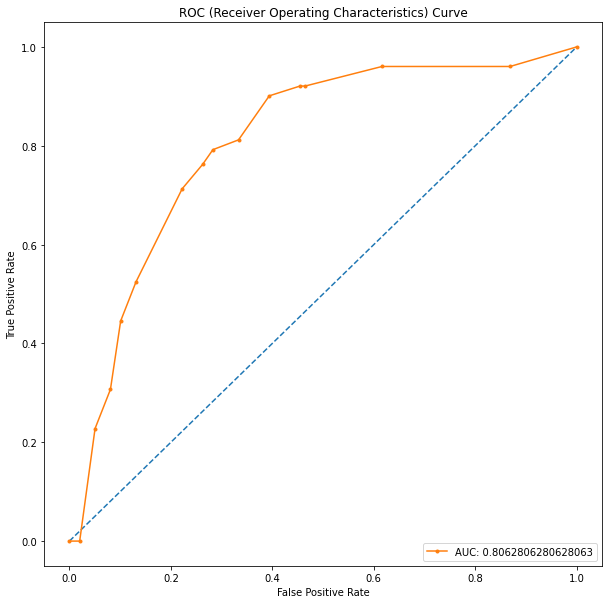

In [66]:
prob_dt = dt2.predict_proba(X_test)
prob_dt = prob_dt[:, 1]
auc_dt = roc_auc_score(y_test, prob_dt)
print(f"AUC: {auc_dt}" )
fpr, tpr, thresholds = roc_curve(y_test, prob_dt)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label = f"AUC: {auc_dt}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

The f1_score, average precision score, AUC are 0.7549019607843138,0.764292142731516,0.6775446854309983 respectively 


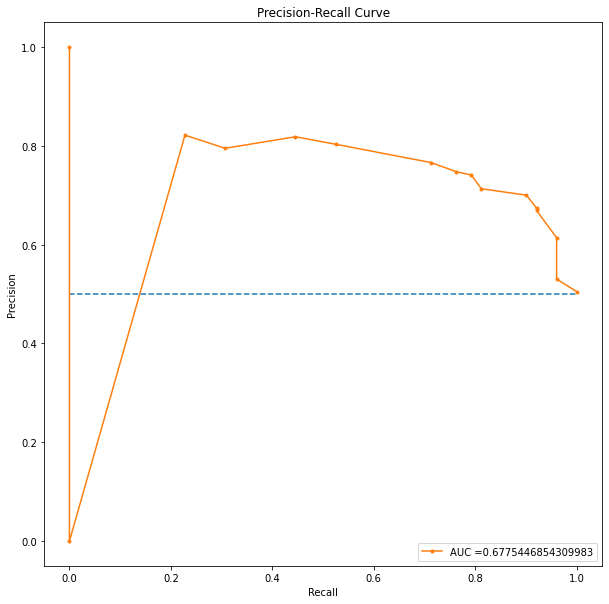

In [67]:
precision, recall, thresholds = precision_recall_curve(y_test,prob_dt)
y_pred_dt = dt2.predict(X_test)
f2 = f1_score(y_test, y_pred_dt)
auc_dt_pr = auc(recall,precision)
avg_prec_dt = average_precision_score(y_test,prob_dt)
print(f"The f1_score, average precision score, AUC are {f2},{avg_prec_dt},{auc_dt_pr} respectively " )
plt.figure(figsize=(10,10))
plt.plot([0,1],[0.5,0.5],linestyle = "--")
plt.plot(recall, precision, marker = ".", label = f"AUC ={auc_dt_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower right")
plt.show()

In [68]:
models.append('DT')
model_accuracy.append(accuracy_score(y_test, y_pred_dt))
model_f1.append(f2)
model_auc.append(auc_dt)

## 3) RandomForest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()

In [70]:
rf1 = RandomForestClassifier()

In [71]:
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
rf1.score(X_train, y_train)

1.0

In [73]:
rf1.score(X_test, y_test)

0.79

## Performance evaluation and optimizing parameters using GridSearchCV:

In [74]:
params = {
'n_estimators': [50,100,150],
    "criterion" :["ginni","entropy"],
'max_depth': [None,1,3,5,7],
'min_samples_leaf': [1,3,5]
}

In [75]:
gs_rf = GridSearchCV(rf1, param_grid=params, cv=10, verbose=0) 

In [76]:
gs_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [None, 1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [77]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [78]:
rf2 = RandomForestClassifier(criterion =  'entropy',
 max_depth = None,
 min_samples_leaf= 3,
 n_estimators= 100)

In [79]:
rf2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3)

In [80]:
rf2.score(X_train,y_train)

0.97125

In [81]:
rf2.score(X_test,y_test)

0.785

AUC: 0.8491849184918491


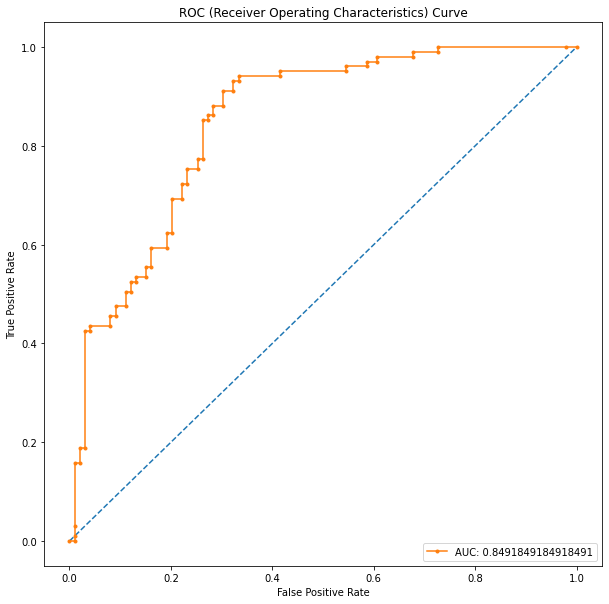

In [82]:
prob_rf = rf2.predict_proba(X_test)
prob_rf = prob_rf[:, 1]
auc_rf = roc_auc_score(y_test, prob_rf)
print(f"AUC: {auc_rf}" )
fpr, tpr, thresholds = roc_curve(y_test, prob_rf)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')apt-get install python-virtualenv
plt.plot(fpr, tpr, marker='.', label = f"AUC: {auc_rf}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

The f1_score, average precision score, AUC are 0.7962085308056872,0.8167738516168028,0.8097201025850491 respectively 


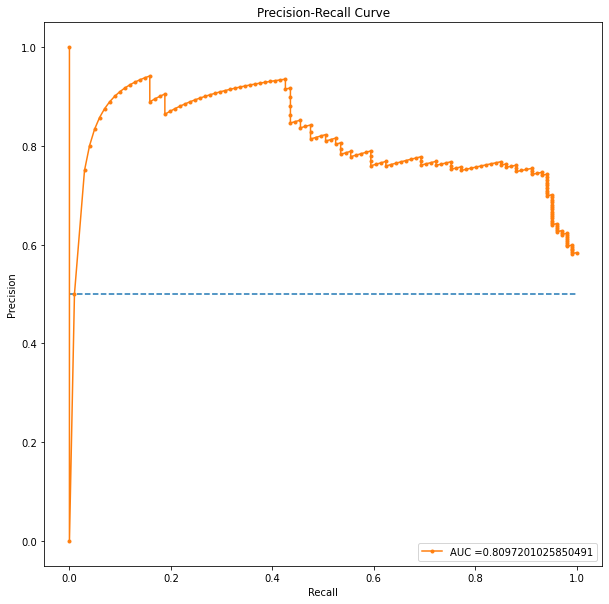

In [83]:
precision, recall, thresholds = precision_recall_curve(y_test,prob_rf)
y_pred_rf = rf2.predict(X_test)
f3 = f1_score(y_test, y_pred_rf)
auc_rf_pr = auc(recall,precision)
avg_prec_rf = average_precision_score(y_test,prob_rf)
print(f"The f1_score, average precision score, AUC are {f3},{avg_prec_rf},{auc_rf_pr} respectively " )
plt.figure(figsize=(10,10))
plt.plot([0,1],[0.5,0.5],linestyle = "--")
plt.plot(recall, precision, marker = ".", label = f"AUC ={auc_rf_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower right")
plt.show()

In [84]:
models.append('RF')
model_accuracy.append(accuracy_score(y_test, y_pred_rf))
model_f1.append(f3)
model_auc.append(auc_rf)

## 4) K-Nearest Neighbour (KNN) Classification:

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier()

In [86]:
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
knn1.score(X_train,y_train)

0.86

In [88]:
knn1.score(X_test,y_test)

0.765

## Performance evaluation and optimizing parameters using GridSearchCV:

In [89]:
knn_neighbors = [i for i in range(2,20)]
    
params_rf = {'n_neighbors': knn_neighbors }

In [90]:
grid_knn = GridSearchCV(knn1,param_grid=params_rf,cv=10,verbose=0)

In [91]:
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19]})

In [92]:
grid_knn.best_params_

{'n_neighbors': 2}

In [93]:
knn2 = KNeighborsClassifier(n_neighbors =  2)

In [94]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [95]:
knn2.score(X_train,y_train)

0.95

In [96]:
knn2.score(X_test,y_test)

0.775

AUC: 0.8307830783078308


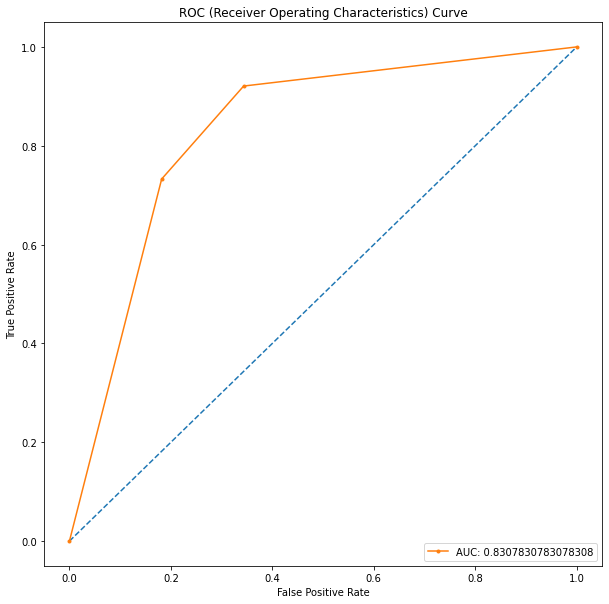

In [97]:
prob_knn = knn2.predict_proba(X_test)
prob_knn = prob_knn[:, 1]
auc_knn = roc_auc_score(y_test, prob_knn)
print(f"AUC: {auc_knn}" )
fpr, tpr, thresholds = roc_curve(y_test, prob_knn)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label = f"AUC: {auc_knn}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

The f1_score, average precision score, AUC are 0.766839378238342,0.7670804451208558,0.854534660244525 respectively 


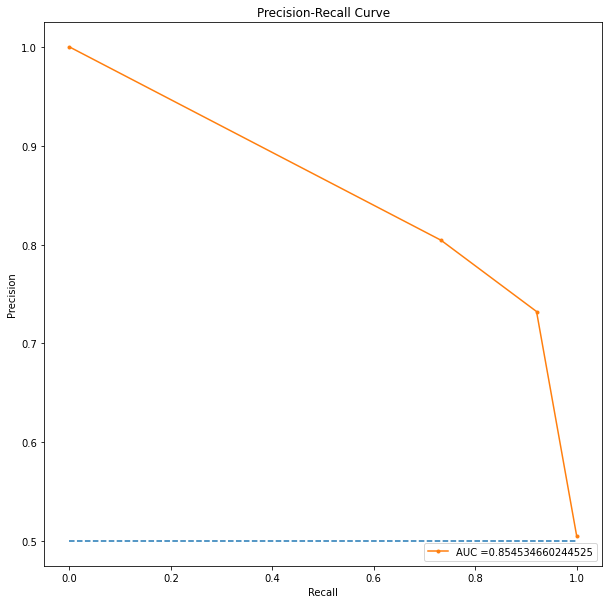

In [98]:
precision, recall, thresholds = precision_recall_curve(y_test,prob_knn)
y_pred_knn = knn2.predict(X_test)
f4 = f1_score(y_test, y_pred_knn)
auc_knn_pr = auc(recall,precision)
avg_prec_knn = average_precision_score(y_test,prob_knn)
print(f"The f1_score, average precision score, AUC are {f4},{avg_prec_knn},{auc_knn_pr} respectively " )
plt.figure(figsize=(10,10))
plt.plot([0,1],[0.5,0.5],linestyle = "--")
plt.plot(recall, precision, marker = ".", label = f"AUC ={auc_knn_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower right")
plt.show()

In [99]:
models.append('KNN')
model_accuracy.append(accuracy_score(y_test, y_pred_knn))
model_f1.append(f4)
model_auc.append(auc_knn)

## 5) Support Vector Machine (SVM) Algorithm:

In [100]:
from sklearn.svm import SVC
svm1 = SVC()

In [101]:
svm1.fit(X_train, y_train)

SVC()

In [102]:
svm1.score(X_train, y_train)

0.74125

In [103]:
svm1.score(X_test, y_test)

0.725

## Performance evaluation and optimizing parameters using GridSearchCV:

In [104]:
params_svm = {
'C':[1, 5, 10, 15, 20, 25],
'gamma':["scale","auto"]
}

In [105]:
grid_svm = GridSearchCV(svm1,param_grid=params_svm,cv = 5, verbose=0)

In [106]:
grid_svm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': ['scale', 'auto']})

In [107]:
grid_svm.best_params_

{'C': 25, 'gamma': 'scale'}

In [108]:
svm2 = SVC(C = 25, gamma = "scale", probability=True)

In [109]:
svm2.fit(X_train,y_train)

SVC(C=25, probability=True)

In [110]:
svm2.score(X_train,y_train)

0.77875

In [111]:
svm2.score(X_test,y_test)

0.705

AUC: 0.8092809280928092


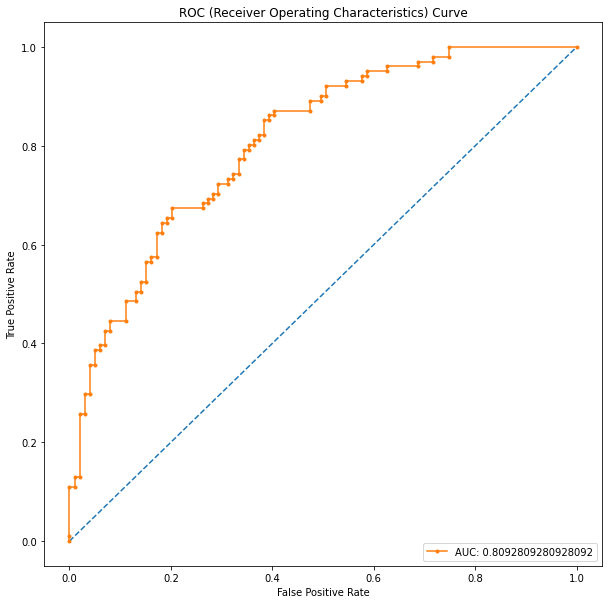

In [112]:
prob_svm = svm2.predict_proba(X_test)
prob_svm = prob_svm[:, 1]
auc_svm = roc_auc_score(y_test, prob_svm)
print(f"AUC: {auc_svm}" )
fpr, tpr, thresholds = roc_curve(y_test, prob_svm)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label = f"AUC: {auc_svm}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

The f1_score, average precision score, AUC are 0.7064676616915423,0.8084593851762945,0.8070479564443822 respectively 


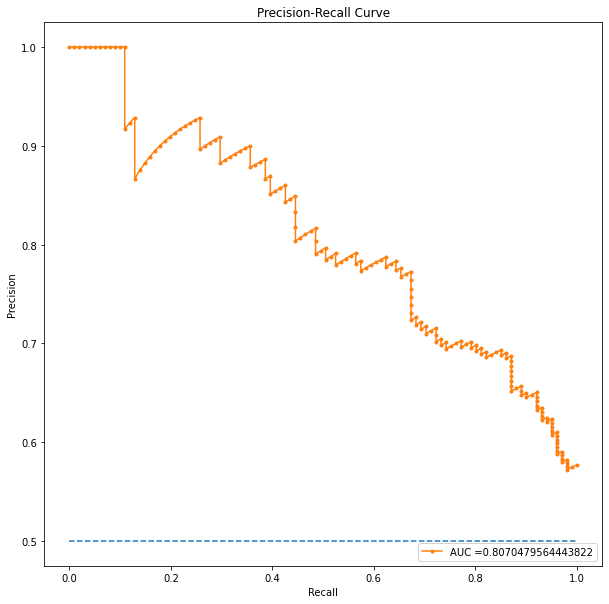

In [113]:
precision, recall, thresholds = precision_recall_curve(y_test,prob_svm)
y_pred_svm = svm2.predict(X_test)
f4 = f1_score(y_test, y_pred_svm)
auc_svm_pr = auc(recall,precision)
avg_prec_svm = average_precision_score(y_test,prob_svm)
print(f"The f1_score, average precision score, AUC are {f4},{avg_prec_svm},{auc_svm_pr} respectively " )
plt.figure(figsize=(10,10))
plt.plot([0,1],[0.5,0.5],linestyle = "--")
plt.plot(recall, precision, marker = ".", label = f"AUC ={auc_svm_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower right")
plt.show()

In [114]:
models.append('SVM')
model_accuracy.append(accuracy_score(y_test,y_pred_svm))
model_f1.append(f4)
model_auc.append(auc_svm)

## 6) Naive Bayes Algorithm:

In [115]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()

In [116]:
gnb.fit(X_train, y_train)

GaussianNB()

In [117]:
gnb.score(X_train, y_train)

0.735

In [118]:
gnb.score(X_test, y_test)

0.775

## Naive Bayes has almost no hyperparameters to tune, so it usually generalizes well.

AUC: 0.8374837483748375


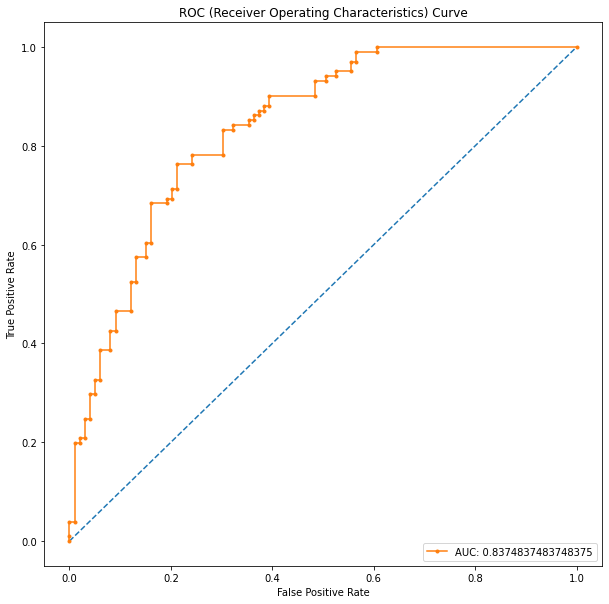

In [119]:
prob_gnb = gnb.predict_proba(X_test)
prob_gnb = prob_gnb[:, 1]
auc_gnb = roc_auc_score(y_test, prob_gnb)
print(f"AUC: {auc_gnb}" )
fpr, tpr, thresholds = roc_curve(y_test, prob_gnb)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label = f"AUC: {auc_gnb}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

The f1_score, average precision score, AUC are 0.7738693467336683,0.8168829109918117,0.8149611071898201 respectively 


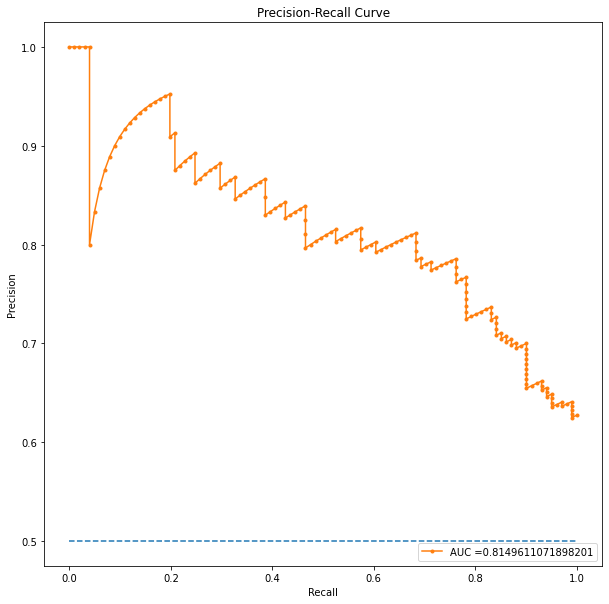

In [120]:
precision, recall, thresholds = precision_recall_curve(y_test,prob_gnb)
y_pred_gnb = gnb.predict(X_test)
f5 = f1_score(y_test, y_pred_gnb)
auc_gnb_pr = auc(recall,precision)
avg_prec_gnb = average_precision_score(y_test,prob_gnb)
print(f"The f1_score, average precision score, AUC are {f5},{avg_prec_gnb},{auc_gnb_pr} respectively " )
plt.figure(figsize=(10,10))
plt.plot([0,1],[0.5,0.5],linestyle = "--")
plt.plot(recall, precision, marker = ".", label = f"AUC ={auc_gnb_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower right")
plt.show()

In [121]:
models.append('GNB')
model_accuracy.append(accuracy_score(y_test, y_pred_gnb))
model_f1.append(f5)
model_auc.append(auc_gnb)

## 7) Ensemble Learning --> Boosting --> Adaptive Boosting:

The f1_score, average precision score, AUC are 0.7738693467336683,0.8168829109918117,0.8149611071898201 respectively 


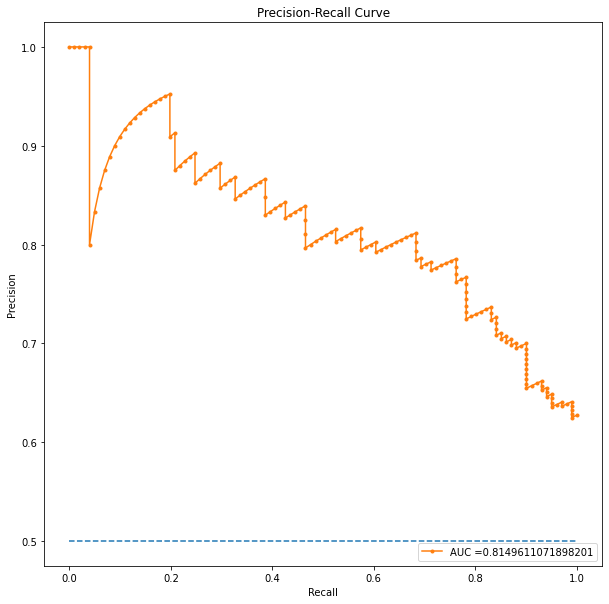

In [122]:
from sklearn.ensemble import AdaBoostClassifier
ada1 = AdaBoostClassifier()
precision, recall, thresholds = precision_recall_curve(y_test,prob_gnb)
y_pred_gnb = gnb.predict(X_test)
f5 = f1_score(y_test, y_pred_gnb)
auc_gnb_pr = auc(recall,precision)
avg_prec_gnb = average_precision_score(y_test,prob_gnb)
print(f"The f1_score, average precision score, AUC are {f5},{avg_prec_gnb},{auc_gnb_pr} respectively " )
plt.figure(figsize=(10,10))
plt.plot([0,1],[0.5,0.5],linestyle = "--")
plt.plot(recall, precision, marker = ".", label = f"AUC ={auc_gnb_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower right")
plt.show()

In [123]:
ada1.fit(X_train,y_train)

AdaBoostClassifier()

In [124]:
ada1.score(X_train,y_train)

0.85625

In [125]:
ada1.score(X_test, y_test)

0.73

## Performance evaluation and optimizing parameters using cross_val_score:

In [126]:
params_ada = {'n_estimators': [100,200,300,400,500,700,1000],"learning_rate":[0.1,0.5,1.0]}

In [127]:
grid_ada = GridSearchCV(ada1,param_grid=params_ada,cv = 5, verbose = 0)

In [128]:
grid_ada.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [100, 200, 300, 400, 500, 700, 1000]})

In [129]:
grid_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [130]:
,"wb","wb","wb","wb","wb"ada2 = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 200)

In [131]:
ada2.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [132]:
ada2.score(X_train,y_train)

0.85625

In [133]:
ada2.score(X_test,y_test)

0.745

AUC: 0.8220822082208221


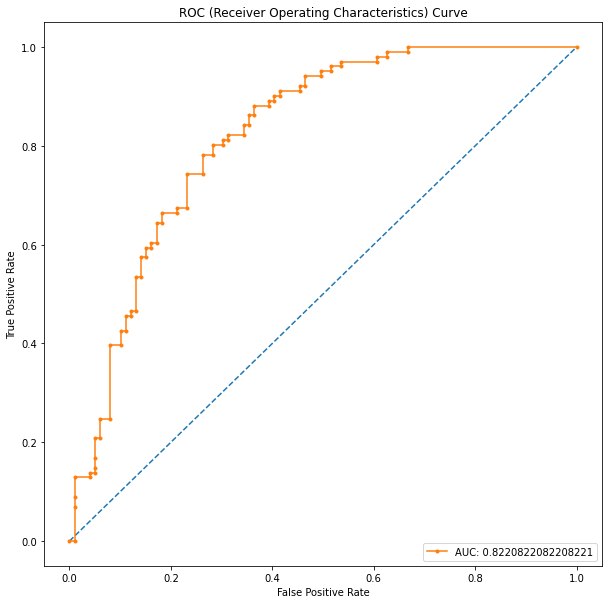

In [134]:
prob_ada = ada2.predict_proba(X_test)
prob_ada = prob_ada[:, 1]
auc_ada = roc_auc_score(y_test, prob_ada)
print(f"AUC: {auc_ada}" )
fpr, tpr, thresholds = roc_curve(y_test, prob_ada)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label = f"AUC: {auc_ada}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

The f1_score, average precision score, AUC are 0.748768472906404,0.7719508448356232,0.7653379071665866 respectively 


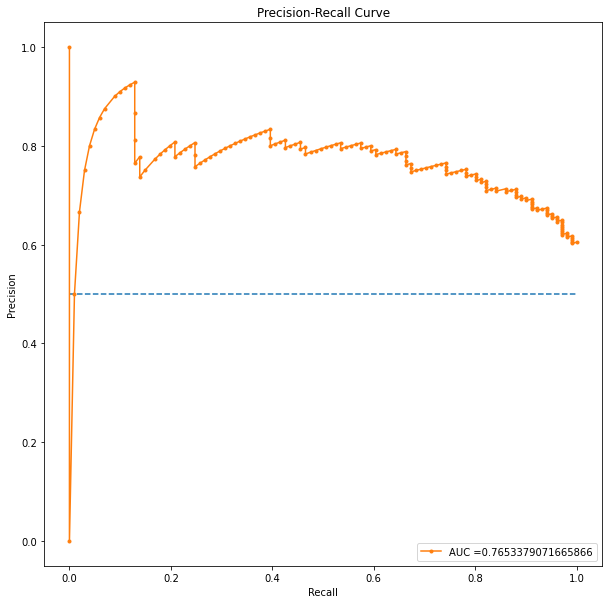

In [135]:
precision, recall, thresholds = precision_recall_curve(y_test,prob_ada)
y_pred_ada = ada2.predict(X_test)
f6 = f1_score(y_test, y_pred_ada)
auc_ada_pr = auc(recall,precision)
avg_prec_ada = average_precision_score(y_test,prob_ada)
print(f"The f1_score, average precision score, AUC are {f6},{avg_prec_ada},{auc_ada_pr} respectively " )
plt.figure(figsize=(10,10))
plt.plot([0,1],[0.5,0.5],linestyle = "--")
plt.plot(recall, precision, marker = ".", label = f"AUC ={auc_ada_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower right")
plt.show()

In [136]:
models.append('ADA')
model_accuracy.append(accuracy_score(y_test, y_pred_ada))
model_f1.append(f6)
model_auc.append(auc_ada)

## 8) Ensemble Learning --> Boosting --> Gradient Boosting (XGBClassifier):

In [137]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier()

In [138]:
xgb1.fit(X_train, y_train)

[21:17:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
xgb1.score(X_train, y_train)

1.0

In [140]:
xgb1.score(X_test, y_test)

0.77

## Performance evaluation and optimizing parameters using GridSearchCV:

In [141]:
params_xgb = {
'max_depth': range (3, 10, 1),
'n_estimators': range(50, 200, 25),
'learning_rate': [0.1, 0.01, 0.05]
}

In [142]:
grid_xgb = GridSearchCV(xgb1, param_grid = params_xgb, scoring = 'roc_auc', n_jobs = 10, cv=5,verbose = 0)

In [ ]:
grid_xgb.fit(X_train,y_train)

In [ ]:
grid_xgb.best_params_

In [144]:
xgb2 = XGBClassifier(learning_rate = 0.05, max_depth = 8, n_estimators =  50)

In [145]:
xgb2.fit(X_train,y_train)

[21:52:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
xgb2.score(X_train,y_train)

0.975

In [147]:
xgb2.score(X_test,y_test)

0.785

AUC: 0.8475847584758476


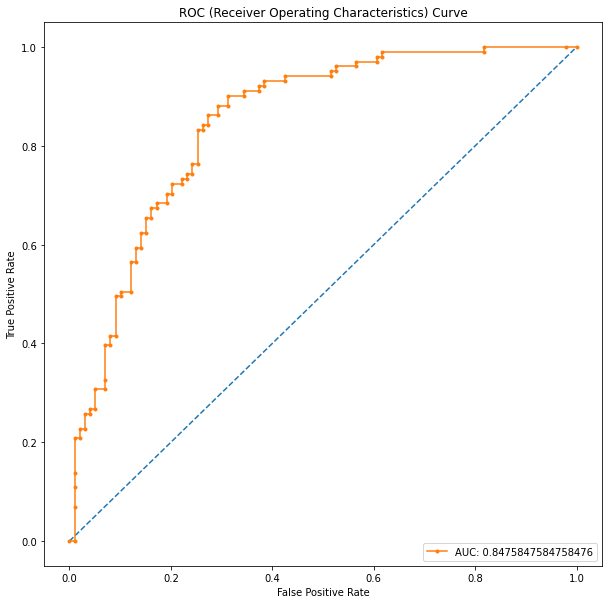

In [148]:
prob_xgb = xgb2.predict_proba(X_test)
prob_xgb = prob_xgb[:, 1]
auc_xgb = roc_auc_score(y_test, prob_xgb)
print(f"AUC: {auc_xgb}" )
fpr, tpr, thresholds = roc_curve(y_test, prob_xgb)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label = f"AUC: {auc_xgb}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

The f1_score, average precision score, AUC are 0.7962085308056872,0.8200487071304574,0.7879953558414641 respectively 


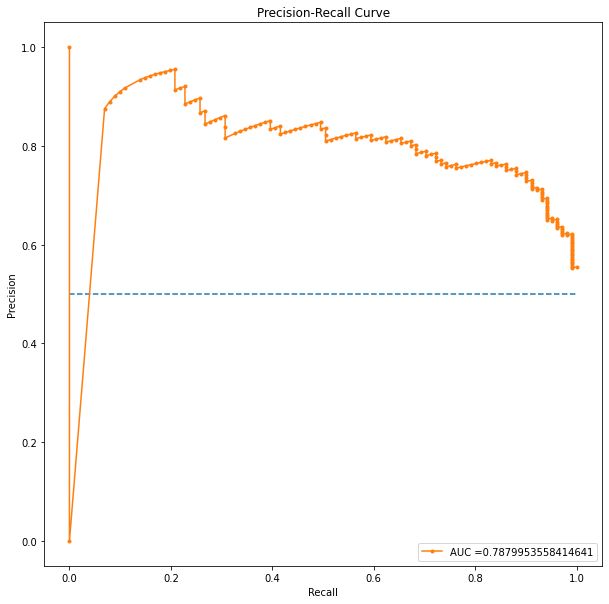

In [149]:
precision, recall, thresholds = precision_recall_curve(y_test,prob_xgb)
y_pred_xgb = xgb2.predict(X_test)
f7 = f1_score(y_test, y_pred_xgb)
auc_xgb_pr = auc(recall,precision)
avg_prec_xgb = average_precision_score(y_test,prob_xgb)
print(f"The f1_score, average precision score, AUC are {f7},{avg_prec_xgb},{auc_xgb_pr} respectively " )
plt.figure(figsize=(10,10))
plt.plot([0,1],[0.5,0.5],linestyle = "--")
plt.plot(recall, precision, marker = ".", label = f"AUC ={auc_xgb_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower right")
plt.show()

In [150]:
models.append('XGB')
model_accuracy.append(accuracy_score(y_test, y_pred_xgb))
model_f1.append(f7)
model_auc.append(auc_xgb)

In [165]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = [["model","model_accuracy","model_f1","model_auc"]])

In [166]:
model_summary

,model,model_accuracy,model_f1,model_auc
0,LR,0.730,0.737864,0.826283
1,DT,0.750,0.754902,0.806281
2,RF,0.785,0.796209,0.849185
3,KNN,0.775,0.766839,0.830783
4,SVM,0.705,0.706468,0.809281
5,GNB,0.775,0.773869,0.837484
6,ADA,0.745,0.748768,0.822082
7,XGB,0.785,0.796209,0.847585


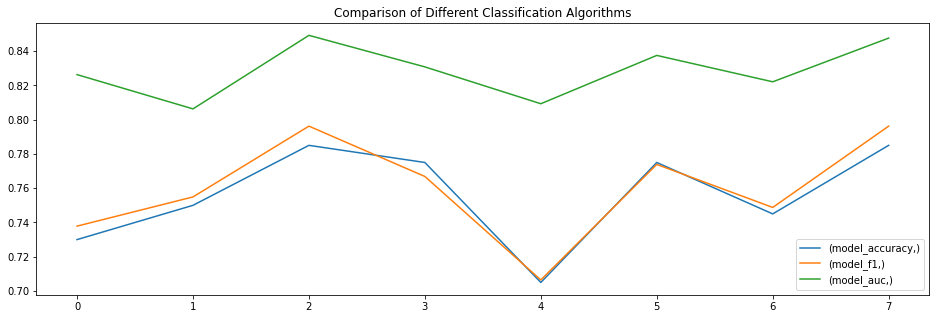

In [173]:
model_summary.plot(figsize=(16,5), label = f"Comparision values")
plt.title("Comparison of Different Classification Algorithms")
plt.legend(loc = "lower right")
plt.show()

## Among all models, RandomForest has given best accuracy and f1_score. Therefore we will build final model using RandomForest.

In [174]:
final_model = rf2

In [175]:
from sklearn.metrics import classification_report

In [176]:
report = classification_report(y_test,final_model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        99
           1       0.76      0.83      0.80       101

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



In [177]:
print(confusion_matrix(y_test,final_model.predict(X_test)))

[[73 26]
 [17 84]]


In [178]:
print(f"Accuracy Score is:{accuracy_score(y_test,final_model.predict(X_test))}")
print(f"Precision Score is:{precision_score(y_test,final_model.predict(X_test))}")
print(f"Recall Score is:{recall_score(y_test,final_model.predict(X_test))}")
print(f"Average Precision Score is:{average_precision_score(y_test,final_model.predict(X_test))}")
print(f"f1Score is:{f1_score(y_test,final_model.predict(X_test))}")
print(f"AUC is:{roc_auc_score(y_test, prob_rf)}")

Accuracy Score is:0.785
Precision Score is:0.7636363636363637
Recall Score is:0.8316831683168316
Average Precision Score is:0.7201035103510351
f1Score is:0.7962085308056872
AUC is:0.8491849184918491


* Accuracy vs. Precision/Recall/F1/AUC: Accuracy is a general metric that does not focus on any specific class and gives equal importance to both true positives and true negatives. In contrast, precision, recall, F1, and AUC consider the performance of the classifier with respect to one particular class (positive class). As a result, accuracy might not be the most informative metric when dealing with imbalanced datasets, where the class distribution is skewed.

* Precision vs. Recall: There is often a trade-off between precision and recall. Increasing the threshold for classifying instances as positive generally improves precision but decreases recall, and vice versa. This trade-off can be visualized through the precision-recall curve.

* Precision, Recall, and F1: F1 score seeks a balance between precision and recall by taking their harmonic mean. When precision and recall are both important in a problem, F1 score becomes a suitable metric to evaluate the model's performance.

* AUC of ROC vs. Precision/Recall/F1: The AUC of ROC curve considers the overall performance of the classifier at different thresholds, rather than just at one specific threshold. It evaluates the model's ability to rank instances and is insensitive to class distribution imbalances.

In conclusion, when evaluating a Random Forest model, it is essential to consider the specific problem context and the class distribution. Each evaluation metric offers unique insights into the model's performance, and choosing the appropriate metric depends on the project requirements and the impact of false positives and false negatives on the problem at hand.

## Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

Pie chart to describe the diabetic or non-diabetic population

Scatter charts between relevant variables to analyze the relationships

Histogram or frequency charts to analyze the distribution of the data

Heatmap of correlation analysis among the relevant variables

Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

### The dashboard link is  - https://public.tableau.com/app/profile/deependra.verma1198/viz/Healthcare-DiabetesDashboard_16904817873760/Dashboard1

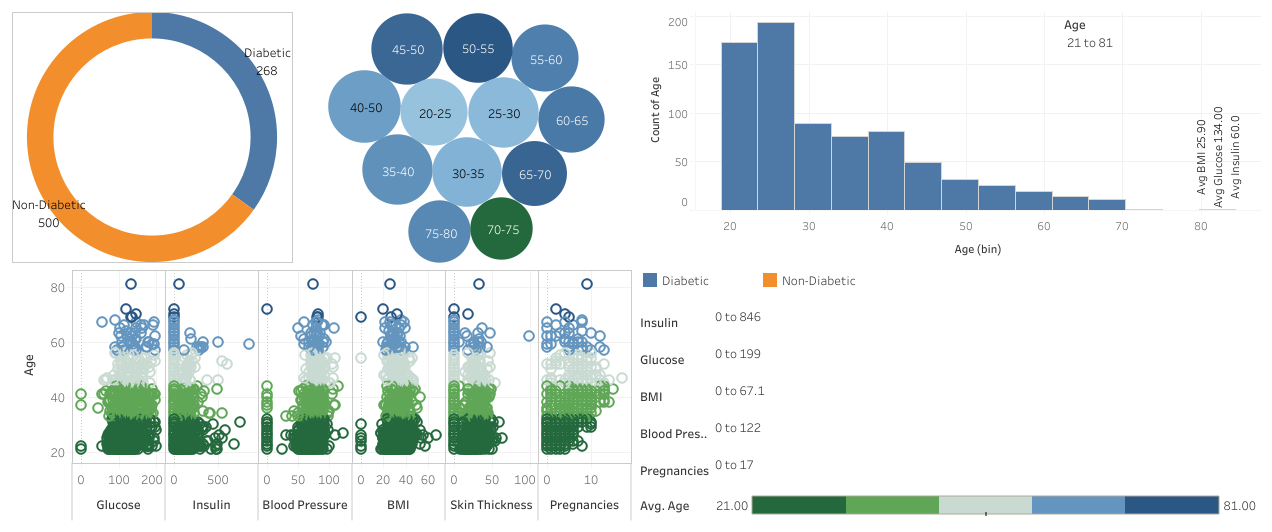

In [179]:
import pickle

In [182]:
model = pickle.dump(final_model,open("model.pkl","wb"))

In [184]:
pickle.load(open("model.pkl","rb"))

RandomForestClassifier(criterion='entropy', min_samples_leaf=3)